<a href="https://colab.research.google.com/github/jechavarria12/Parcial_1_Fraude/blob/main/Parcial_1_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parcial 1


# 0. Preparación del entorno

##0.1 Instalación de librerías


In [ ]:
#Instalación de las librerías
!pip install -q pandas
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q yellowbrick
!pip install -q scikit-learn
!pip install -q imbalanced-learn
!pip install -q tqdm
!pip install -q joblib
!pip install -q huggingface_hub
!pip install -q datasets
!pip install ydata_profiling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ee34204d092ff0be346a79d9b3226f77db23436be6b252310bdec4adb380b910
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405e

## 0.2 Definir semilla

In [ ]:
# Importar las librerías necesarias y definir la semilla
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 42

# 1 Carga y Explicación del dataset

Este estudio se centrará en predecir si una transacción financiera es fraudulenta o no utilizando la base de datos `credit_fraud_detection `de Hugging Face. Para esto, se proporciona información detallada sobre cada transacción como: montos, saldos previos y posteriores, y tipos de operación como transacciones en efectivo, pagos o transferencias. Tmbién, incluye indicadores binarios que permiten clasificar si una transacción es fraudulenta o si ha resultado en un sobregiro no autorizado. La variable que se quiere predecir es la variable binaria `"isFraud"` que toma un valor de 1 si la transacción es fraudulenta y 0 de lo contrario. Este conjunto de datos es útil porque tiene muchas observaciónes (más de 3 millones), lo que permite entrenar los modelos de de aprendizaje automático para que aprendan a detectar fraudes en tiempo real, ayudando a las instituciones financieras a prevenir pérdidas y mejorar la seguridad de sus sistemas de pago.

In [ ]:
#Como nuestro Dataset ya está dividido en variables de trai y test imposrtamos estas ya separadas del archivo
# Definir las rutas de los archivos en Hugging Face
splits = {
    'train': 'hf://datasets/rohan-chandrashekar/credit_fraud_detection/data/train-00000-of-00001.parquet',

    'test': 'hf://datasets/rohan-chandrashekar/credit_fraud_detection/data/test-00000-of-00001.parquet'
}

# Cargar los datos en DataFrames
df_train = pd.read_parquet(splits['train'])
df_test = pd.read_parquet(splits['test'])

# Mostrar información básica
print(f"Tamaño de train: {df_train.shape}")
print(f"Tamaño de test: {df_test.shape}")

# Vista previa de los datos
print(df_train.head())

Tamaño de train: (2599503, 14)
Tamaño de test: (557037, 14)
       amount  nameOrig  oldBalanceOrig  newBalanceOrig  nameDest  \
0    83567.84      1270            0.00        83567.84     17600   
1  1221867.91     70795      1221867.91            0.00     22281   
2   322138.17      2881      1595257.55      1917395.71     37826   
3    89476.25     21364      1018602.32      1108078.57     32142   
4    14372.57     20391       603534.13       617906.69      9164   

   oldBalanceDest  newBalanceDest  isFraud  isUnauthorizedOverdraft  \
0        34594.35        34594.35        0                        0   
1        34873.36        34873.36        1                        0   
2       121986.83       121986.83        0                        0   
3        44718.52        44718.52        0                        0   
4       108732.54       108732.54        0                        0   

   action__CASH_IN  action__CASH_OUT  action__DEBIT  action__PAYMENT  \
0                1        

La base de datos se compone de 14 columnas, que son las diferentes variables y 3.713.576 de observaciones que ya están divididas en el grupo de entrenameinto, validación y prueba.

El conjunto de datos de detección de fraude crediticio disponible en [Hugging Face](https://huggingface.co/datasets/rohan-chandrashekar/credit_fraud_detection) contiene las siguientes 14 variables representadas en las columnas:

| **Columna**                  | **Descripción**                                                                                                                                                                                                 | **Tipo de Variable** |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------|
| `amount`                      | Monto de la transacción.                                                                                                                                                                                        | Numérica (float64)   |
| `nameOrig`                    | Identificador único del cliente que inicia la transacción.                                                                                                                                                      | Categórica (int64)   |
| `oldBalanceOrig`              | Saldo de la cuenta del originador antes de la transacción.                                                                                                                                                      | Numérica (float64)   |
| `newBalanceOrig`              | Saldo de la cuenta del originador después de la transacción.                                                                                                                                                    | Numérica (float64)   |
| `nameDest`                    | Identificador único del cliente o entidad que recibe la transacción.                                                                                                                                            | Categórica (int64)   |
| `oldBalanceDest`              | Saldo de la cuenta del destinatario antes de la transacción.                                                                                                                                                    | Numérica (float64)   |
| `newBalanceDest`              | Saldo de la cuenta del destinatario después de la transacción.                                                                                                                                                  | Numérica (float64)   |
| `isFraud`                     | Indicador de si la transacción es fraudulenta (1) o no (0).                                                                                                                                                     | Binaria (int64)      |
| `isUnauthorizedOverdraft`     | Indicador de si la transacción resultó en un sobregiro no autorizado (1) o no (0).                                                                                                                              | Binaria (int64)      |
| `action__CASH_IN`             | Indicador de si la acción de la transacción es un depósito de efectivo (1) o no (0).                                                                                                                            | Binaria (int64)      |
| `action__CASH_OUT`            | Indicador de si la acción de la transacción es un retiro de efectivo (1) o no (0).                                                                                                                              | Binaria (int64)      |
| `action__DEBIT`               | Indicador de si la acción de la transacción es un débito (1) o no (0).                                                                                                                                           | Binaria (int64)      |
| `action__PAYMENT`             | Indicador de si la acción de la transacción es un pago (1) o no (0).                                                                                                                                            | Binaria (int64)      |
| `action__TRANSFER`            | Indicador de si la acción de la transacción es una transferencia (1) o no (0).                                                                                                                                   | Binaria (int64)      |


## 1.1 Division de datos train y test

In [ ]:
#En esta casilla podemos reducir el numero de datos que vamos a escoger porque realmente se dividen arriba (se cargan ya divididos)

display(df_train.head())
display(df_test.head())

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,83567.84,1270,0.00,83567.84,17600,34594.35,34594.35,0,0,1,0,0,0,0
1,1221867.91,70795,1221867.91,0.00,22281,34873.36,34873.36,1,0,0,1,0,0,0
2,322138.17,2881,1595257.55,1917395.71,37826,121986.83,121986.83,0,0,1,0,0,0,0
3,89476.25,21364,1018602.32,1108078.57,32142,44718.52,44718.52,0,0,1,0,0,0,0
4,14372.57,20391,603534.13,617906.69,9164,108732.54,108732.54,0,0,1,0,0,0,0


,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,73800.89,15374,2534460.75,2460659.86,35922,81483.02,81483.02,0,0,0,1,0,0,0
1,196871.36,14559,1539057.79,1735929.16,48287,54029.17,54029.17,0,0,1,0,0,0,0
2,230141.98,22934,502864.24,733006.22,31892,8058.23,8058.23,0,0,1,0,0,0,0
3,227774.04,8379,60025.05,287799.09,978,11786.02,11786.02,0,0,1,0,0,0,0
4,65725.33,5391,2851847.83,2917573.16,35100,21051.19,21051.19,0,0,1,0,0,0,0


# 2 Análisis descriptivo


In [ ]:
#Confirmamos que los datos ha sido correctamente instalados

print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2599503 entries, 0 to 2599502
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amount                   float64
 1   nameOrig                 int64  
 2   oldBalanceOrig           float64
 3   newBalanceOrig           float64
 4   nameDest                 int64  
 5   oldBalanceDest           float64
 6   newBalanceDest           float64
 7   isFraud                  int64  
 8   isUnauthorizedOverdraft  int64  
 9   action__CASH_IN          int64  
 10  action__CASH_OUT         int64  
 11  action__DEBIT            int64  
 12  action__PAYMENT          int64  
 13  action__TRANSFER         int64  
dtypes: float64(5), int64(9)
memory usage: 277.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557037 entries, 0 to 557036
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 

## 2.1 Análisis datos de TRAIN

### Reporte y matriz datos TRAIN

In [ ]:
#Confirmamos los datos TRAIN:
df_train.head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,83567.84,1270,0.00,83567.84,17600,34594.35,34594.35,0,0,1,0,0,0,0
1,1221867.91,70795,1221867.91,0.00,22281,34873.36,34873.36,1,0,0,1,0,0,0
2,322138.17,2881,1595257.55,1917395.71,37826,121986.83,121986.83,0,0,1,0,0,0,0
3,89476.25,21364,1018602.32,1108078.57,32142,44718.52,44718.52,0,0,1,0,0,0,0
4,14372.57,20391,603534.13,617906.69,9164,108732.54,108732.54,0,0,1,0,0,0,0


REPORTE DATOS TRAIN

In [ ]:
#Análisis descriptivo de los datos de entrenamiento sin nigun cambio previo:
from ydata_profiling import ProfileReport
reporte_train = ProfileReport(df_train, title="Profiling Report Train dataset")
reporte_train.to_file("reporte_train.html")
reporte_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

MATRIZ DATOS TRAIN

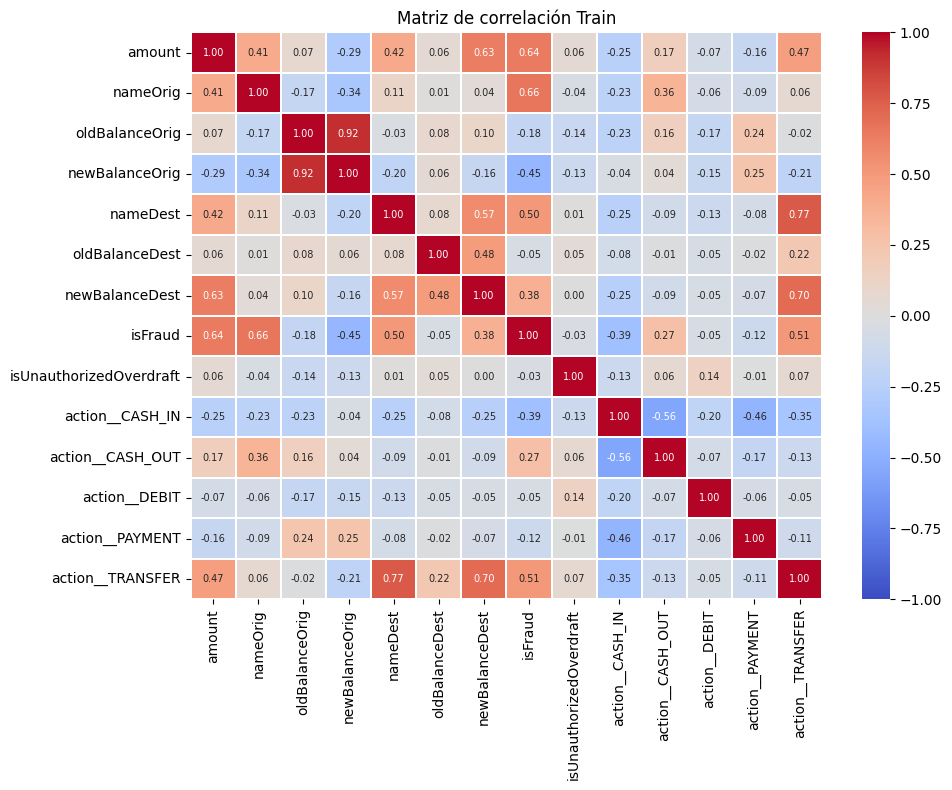

In [ ]:
#Hacer matriz de correlación para TRAIN

numeric_df_train = df_train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_train.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlación Train', fontsize=12)
plt.tight_layout()
plt.show()

### Desbalance datos TRAIN


Porcentajes:
Clase 0: 90.93%
Clase 1: 9.07%


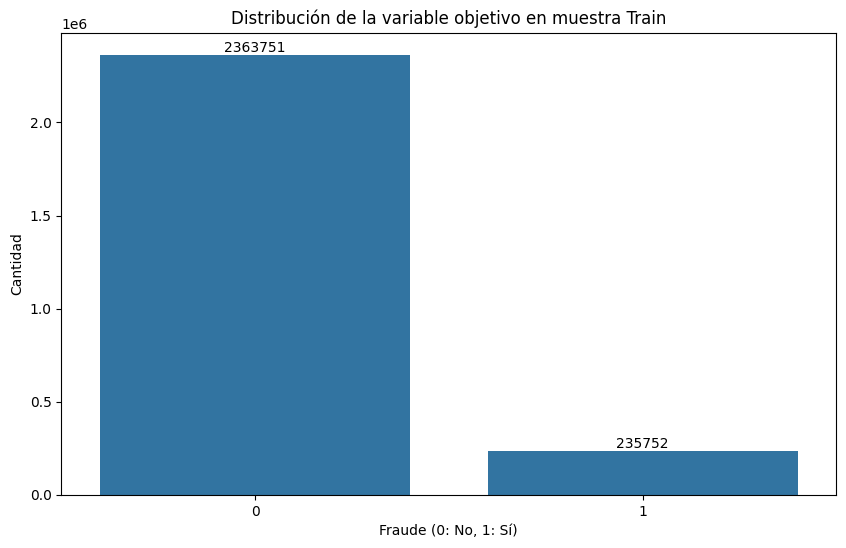

In [ ]:
#Analizar desbalance de clases

class_dist = df_train['isFraud'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='isFraud')
plt.title('Distribución de la variable objetivo en muestra Train')
plt.xlabel('Fraude (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

Como se observa en la gráfica, la distribucuión de los datos para la variable objetivo, la cual detecta si la transacción es fraude, está desbalanceada un 10 a 1.

## 2.2 Limpieza datos TRAIN

Eliminar valores NA y 0 TRAIN

In [ ]:
#Eliminar valores de NA de la variable de interés
df_train = df_train.dropna(subset=['isFraud'])

#Separar los datos de entrada X como variables explicativas y la variable a predecir Y en df_train
X_train,y_train = df_train.drop(['isFraud'], axis=1), df_train['isFraud']
display(X_train.head())
display(y_train.head())

#Valores nulos
X_train.isnull().sum()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,83567.84,1270,0.00,83567.84,17600,34594.35,34594.35,0,1,0,0,0,0
1,1221867.91,70795,1221867.91,0.00,22281,34873.36,34873.36,0,0,1,0,0,0
2,322138.17,2881,1595257.55,1917395.71,37826,121986.83,121986.83,0,1,0,0,0,0
3,89476.25,21364,1018602.32,1108078.57,32142,44718.52,44718.52,0,1,0,0,0,0
4,14372.57,20391,603534.13,617906.69,9164,108732.54,108732.54,0,1,0,0,0,0


,isFraud
0,0
1,1
2,0
3,0
4,0


,0
amount,0
nameOrig,0
oldBalanceOrig,0
newBalanceOrig,0
nameDest,0
oldBalanceDest,0
newBalanceDest,0
isUnauthorizedOverdraft,0
action__CASH_IN,0
action__CASH_OUT,0


Como se observa que las observaciones no tienen valores nulos, no es necesario reemplazar los valores

ESTANDARIZACIÓN DE LOS DATOS TRAIN

## 2.3 Análisis datos TEST

### Reporte y matriz datos TEST

In [ ]:
#Análisis de los datos de prueba:
df_test.head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,73800.89,15374,2534460.75,2460659.86,35922,81483.02,81483.02,0,0,0,1,0,0,0
1,196871.36,14559,1539057.79,1735929.16,48287,54029.17,54029.17,0,0,1,0,0,0,0
2,230141.98,22934,502864.24,733006.22,31892,8058.23,8058.23,0,0,1,0,0,0,0
3,227774.04,8379,60025.05,287799.09,978,11786.02,11786.02,0,0,1,0,0,0,0
4,65725.33,5391,2851847.83,2917573.16,35100,21051.19,21051.19,0,0,1,0,0,0,0


REPORTE DATOS TEST

In [ ]:
#Análisis descriptivo de los datos de prueba:
from ydata_profiling import ProfileReport
reporte_test = ProfileReport(df_test, title="Profiling Report Test dataset")
reporte_test.to_file("reporte_test.html")

reporte_test

MATRIZ DE TEST

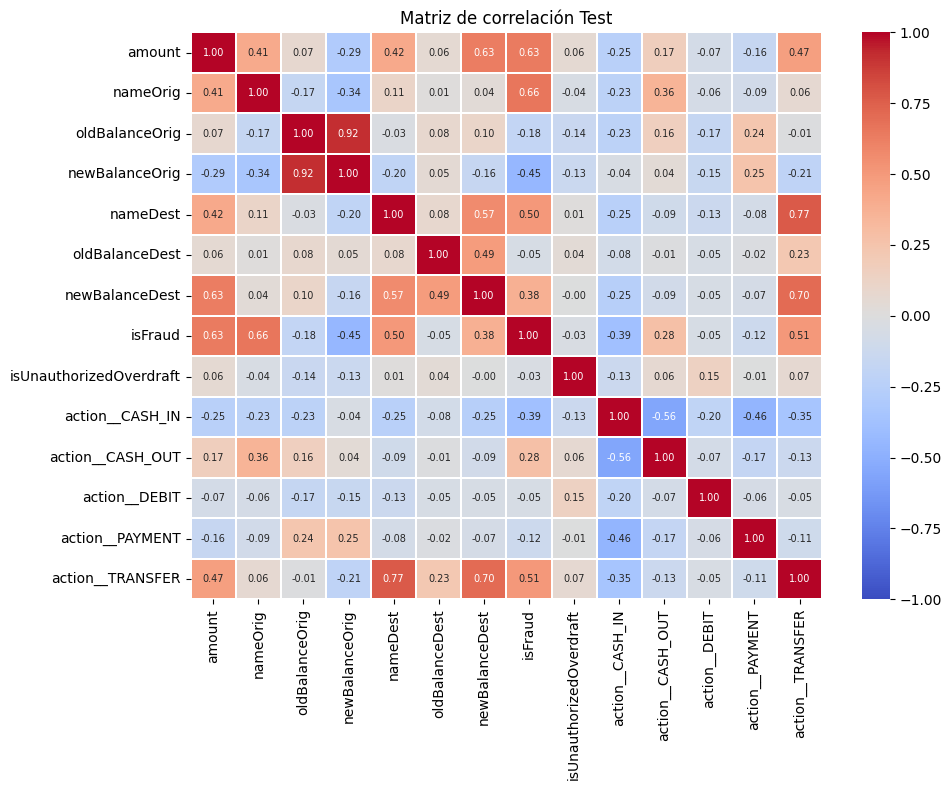

In [ ]:
#Hacer matriz de correlación

numeric_df_test = df_test.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_test.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 7}, fmt=".2f", linewidths=0.3)

plt.title('Matriz de correlación Test', fontsize=12)
plt.tight_layout()
plt.show()

### Desbalance datos TEST


Porcentajes:
Clase 0: 90.93%
Clase 1: 9.07%


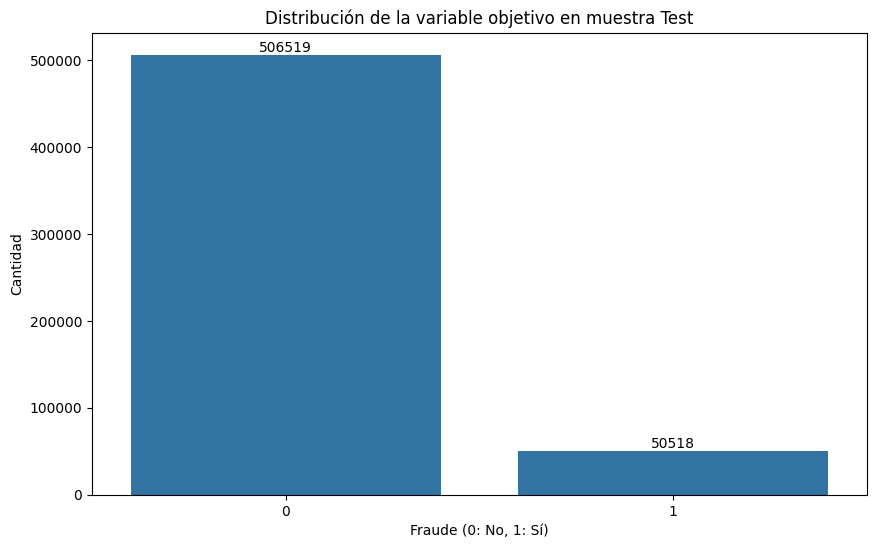

In [ ]:
#Analizar desbalance de clases

class_dist = df_test['isFraud'].value_counts(normalize=True)
print("\nPorcentajes:")
for clase, porcentaje in class_dist.items():
    print(f"Clase {clase}: {porcentaje*100:.2f}%")

# Visualizamos la distribución con un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='isFraud')
plt.title('Distribución de la variable objetivo en muestra Test')
plt.xlabel('Fraude (0: No, 1: Sí)')
plt.ylabel('Cantidad')

# Añadimos los valores exactos sobre cada barra
for i in plt.gca().containers[0]:
    plt.text(i.get_x() + i.get_width()/2,
            i.get_height(),
            f'{int(i.get_height())}',
            ha='center', va='bottom')

plt.show()

Como se observa en la gráfica, la distribucuión de los datos para la ariable objetivo, la cual detecta si la transacción es fraude, está desbalanceada.

## 2.4 Limpieza datos TEST

VERIFICACION DE NULOS Y DEFINIR y

In [ ]:
#Eliminar valores de NA de la variable de interés
df_test = df_test.dropna(subset=['isFraud'])

#Separar los datos de entrada X como variables explicativas y la variable a predecir Y en df_test
X_test,y_test = df_test.drop(['isFraud'], axis=1), df_test['isFraud']
display(X_test.head())
display(y_test.head())
print(X_test.shape)

#valores nulos
X_test.isnull().sum()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isUnauthorizedOverdraft,action__CASH_IN,action__CASH_OUT,action__DEBIT,action__PAYMENT,action__TRANSFER
0,73800.89,15374,2534460.75,2460659.86,35922,81483.02,81483.02,0,0,1,0,0,0
1,196871.36,14559,1539057.79,1735929.16,48287,54029.17,54029.17,0,1,0,0,0,0
2,230141.98,22934,502864.24,733006.22,31892,8058.23,8058.23,0,1,0,0,0,0
3,227774.04,8379,60025.05,287799.09,978,11786.02,11786.02,0,1,0,0,0,0
4,65725.33,5391,2851847.83,2917573.16,35100,21051.19,21051.19,0,1,0,0,0,0


,isFraud
0,0
1,0
2,0
3,0
4,0


(557037, 13)


,0
amount,0
nameOrig,0
oldBalanceOrig,0
newBalanceOrig,0
nameDest,0
oldBalanceDest,0
newBalanceDest,0
isUnauthorizedOverdraft,0
action__CASH_IN,0
action__CASH_OUT,0


Como se observa que las observaciones no tienen valores nulos, no es necesario reemplazar los valores.

#3. Procesamiento Inicial

CREAR NUEVAS VARIABLES DERIVADAS

balance_change_Orig = oldBalanceOrig - newBalanceOrig Eliminar las variables originales: oldBalanceOrig, newBalanceOrig, newBalanceDest.

Borramos newBalanceDest porque en todas las casillas es igual a oldBalanceDest

In [ ]:
# ✅ CREACIÓN DE VARIABLES DERIVADAS Y TRANSFORMACIÓN DE VARIABLES DE ACCIÓN

# 📌 Para TRAIN
# Crear nuevas variables derivadas
X_train['balance_change_Orig'] = X_train['oldBalanceOrig'] - X_train['newBalanceOrig']

# Eliminar columnas originales
X_train.drop(columns=['oldBalanceOrig', 'newBalanceOrig', 'newBalanceDest'], inplace=True)


# 📌 Para TEST
# Crear nuevas variables derivadas
X_test['balance_change_Orig'] = X_test['oldBalanceOrig'] - X_test['newBalanceOrig']

# Eliminar columnas originales
X_test.drop(columns=['oldBalanceOrig', 'newBalanceOrig', 'newBalanceDest'], inplace=True)



# ✔ Verificar las primeras filas
X_train.head(), X_test.head()

Estandarización de Test y Train por aparte

In [ ]:

# 1️⃣ Definir variables continuas, binarias y categóricas
variables_continuas = ['amount', 'balance_change_Orig', 'oldBalanceDest' ]
variables_binarias = ['isUnauthorizedOverdraft', 'action__CASH_IN', 'action__CASH_OUT', 'action__DEBIT', 'action__PAYMENT', 'action__TRANSFER']
variables_ids = ['nameOrig', 'nameDest']  # <-- Mantenemos estas columnas sin cambios

# 2️⃣ Aplicar StandardScaler SOLO a las variables continuas
X_continuas_train = X_train[variables_continuas]
X_continuas_test = X_test[variables_continuas]

scaler = StandardScaler()
X_train_scaled_cont = scaler.fit_transform(X_continuas_train)
X_test_scaled_cont = scaler.transform(X_continuas_test)

# 3️⃣ Reconstruir X_train_scaled y X_test_scaled manteniendo las binarias y categóricas sin cambios
X_train_scaled = pd.DataFrame(X_train_scaled_cont, columns=variables_continuas).reset_index(drop=True)
X_test_scaled = pd.DataFrame(X_test_scaled_cont, columns=variables_continuas).reset_index(drop=True)

# 4️⃣ Agregar variables binarias, categóricas y los IDs sin modificar
X_train_scaled[variables_binarias] = X_train[variables_binarias].reset_index(drop=True)
X_test_scaled[variables_binarias] = X_test[variables_binarias].reset_index(drop=True)


X_train_scaled[variables_ids] = X_train[variables_ids].reset_index(drop=True)
X_test_scaled[variables_ids] = X_test[variables_ids].reset_index(drop=True)

# 5️⃣ Verificar resultados
X_train_scaled.head(), X_test_scaled.head()


MIRAR CORRELACION DE VARIABLES CON Y

In [ ]:
#Borrar variables poco relevantes

# 1️⃣ Eliminar variables identificadoras y redundantes

from sklearn.preprocessing import LabelEncoder

# Codificar la variable 'action' en TRAIN y TEST
encoder = LabelEncoder()
X_train['action'] = encoder.fit_transform(X_train['action'])
X_test['action'] = encoder.transform(X_test['action'])

# 2️⃣ Verificar correlaciones bajas con isFraud
correlaciones = X_train.corrwith(y_train).abs().sort_values()
print("Correlaciones con isFraud:\n", correlaciones)


# 4 Primer modelo

## REGRESIÓN RIDGE L2


🔹 Mejor modelo: LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')
🔹 Mejores hiperparámetros: {'C': 0.001}

🔹 Métricas en el conjunto de prueba:
Accuracy: 0.8974
Precision: 0.9225
Recall: 0.8974
F1-Score: 0.9069


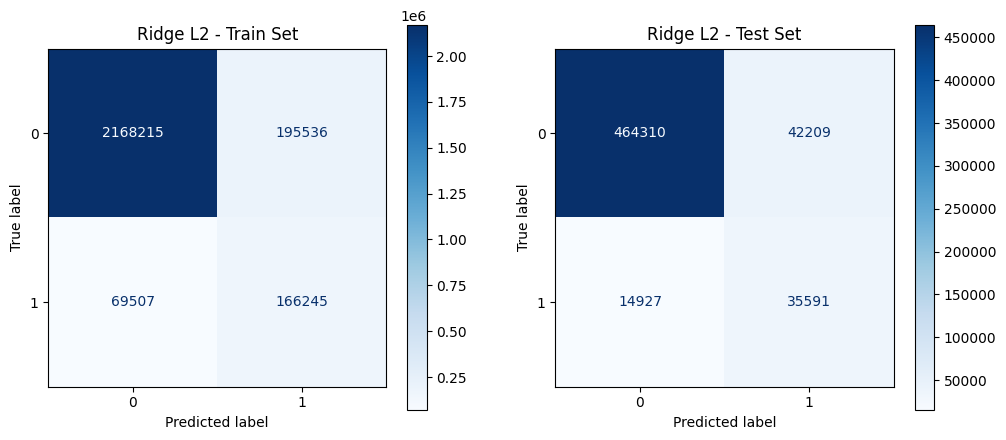

In [ ]:
# Importar librerías
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Definir el modelo base con Ridge (L2)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# 2️⃣ Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverso de la fuerza de regularización
}

# 3️⃣ Realizar búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4️⃣ Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\n🔹 Mejor modelo: {best_model}")
print(f"🔹 Mejores hiperparámetros: {best_params}")

# 5️⃣ Realizar predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 6️⃣ Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\n🔹 Métricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 7️⃣ Mostrar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusión - Train
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
axes[0].set_title("Ridge L2 - Train Set")
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

# Matriz de Confusión - Test
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
axes[1].set_title("Ridge L2 - Test Set")
disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

plt.show()


BALANCEO DE DATOS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1️⃣ Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\n🔹 Datos originales: {y_train.value_counts().to_dict()}")
print(f"🔹 Datos balanceados con SMOTE: {y_train_balanced.value_counts().to_dict()}")


🔹 Datos originales: {0: 2363751, 1: 235752}
🔹 Datos balanceados con SMOTE: {0: 2363751, 1: 2363751}


Ridge l2 con datos balanceados


🔹 Mejor modelo: LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')
🔹 Mejores hiperparámetros: {'C': 0.001}

🔹 Métricas en el conjunto de prueba (Balanceado con SMOTE):
Accuracy: 0.7013
Precision: 0.9304
Recall: 0.7013
F1-Score: 0.7648


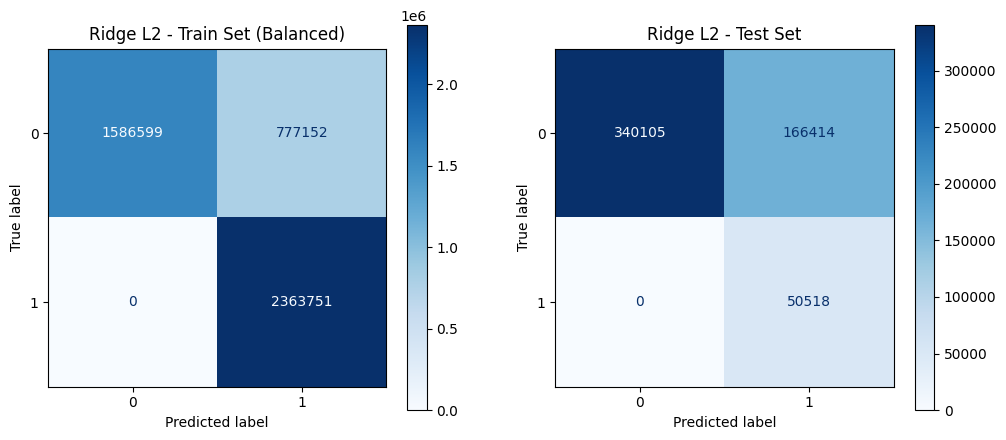

In [ ]:
# 2️⃣ Definir el modelo base con Ridge (L2)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# 3️⃣ Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverso de la fuerza de regularización
}

# 4️⃣ Realizar búsqueda de hiperparámetros con los datos balanceados
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# 5️⃣ Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\n🔹 Mejor modelo: {best_model}")
print(f"🔹 Mejores hiperparámetros: {best_params}")

# 6️⃣ Realizar predicciones
y_train_pred_balanced = best_model.predict(X_train_balanced)
y_test_pred_balanced = best_model.predict(X_test)

# 7️⃣ Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred_balanced)
precision = precision_score(y_test, y_test_pred_balanced, average='weighted')
recall = recall_score(y_test, y_test_pred_balanced, average='weighted')
f1 = f1_score(y_test, y_test_pred_balanced, average='weighted')

print("\n🔹 Métricas en el conjunto de prueba (Balanceado con SMOTE):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 8️⃣ Mostrar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusión - Train (Balanceado)
cm_train = confusion_matrix(y_train_balanced, y_train_pred_balanced)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
axes[0].set_title("Ridge L2 - Train Set (Balanced)")
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

# Matriz de Confusión - Test
cm_test = confusion_matrix(y_test, y_test_pred_balanced)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
axes[1].set_title("Ridge L2 - Test Set")
disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

plt.show()

## REGRESION Lasso (L1)

In [ ]:
# Importar librerías
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Definir el modelo base con Lasso (L1)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# 2️⃣ Definir la grilla de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverso de la fuerza de regularización
}

# 3️⃣ Realizar búsqueda de hiperparámetros sin balancear los datos
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4️⃣ Obtener el mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\n🔹 Mejor modelo: {best_model}")
print(f"🔹 Mejores hiperparámetros: {best_params}")

# 5️⃣ Realizar predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 6️⃣ Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\n🔹 Métricas en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 7️⃣ Mostrar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de Confusión - Train
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
axes[0].set_title("Lasso L1 - Train Set")
disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')

# Matriz de Confusión - Test
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
axes[1].set_title("Lasso L1 - Test Set")
disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')

plt.show()


KeyboardInterrupt: 